# Age dataset analsasyis

## * libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

## * display warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Read dataset

### dataset
https://www.kaggle.com/datasets/imoore/age-dataset/code

In [3]:
df= pd.read_csv('AgeDataset-V1.csv')
df

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
...,...,...,...,...,...,...,...,...,...,...
1223004,Q77247326,Marie-Fortunée Besson,Frans model (1907-1996),NaN,France,Tailor; model,1907,1996.0,NaN,89.0
1223005,Q77249504,Ron Thorsen,xugador de baloncestu canadianu (1948–2004),NaN,Canada; United States of America,Athlete,1948,2004.0,NaN,56.0
1223006,Q77249818,Diether Todenhagen,German navy officer and world war II U-boat co...,NaN,Germany,Military personnel,1920,1944.0,NaN,24.0
1223007,Q77253909,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,NaN,28.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


In [5]:
df.isnull().sum()

Id                         0
Name                       0
Short description      67900
Gender                133646
Country               335509
Occupation            206914
Birth year                 0
Death year                 1
Manner of death      1169406
Age of death               1
dtype: int64

## Check for duplicates in data

In [6]:
df.duplicated().sum()

2

In [7]:
df= df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

## Remove the useless columns

In [9]:
df.drop(['Id'],axis=1, inplace=True)
df.drop(['Short description'],axis=1, inplace=True)
df.drop(['Manner of death'], axis=1, inplace=True)
df

,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
0,George Washington,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,67.0
1,Douglas Adams,Male,United Kingdom,Artist,1952,2001.0,49.0
2,Abraham Lincoln,Male,United States of America,Politician,1809,1865.0,56.0
3,Wolfgang Amadeus Mozart,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,35.0
4,Ludwig van Beethoven,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,57.0
...,...,...,...,...,...,...,...
1223004,Marie-Fortunée Besson,NaN,France,Tailor; model,1907,1996.0,89.0
1223005,Ron Thorsen,NaN,Canada; United States of America,Athlete,1948,2004.0,56.0
1223006,Diether Todenhagen,NaN,Germany,Military personnel,1920,1944.0,24.0
1223007,Reginald Oswald Pearson,Male,United Kingdom,Artist,1887,1915.0,28.0


# Data preprocessing 

### * Data cleaning and cleansing
### * Detect and handle outliers
### * Work with missing data
### * Work with categorical data

In [10]:
df.isnull().sum()/df.shape [0] *100

Name             0.000000
Gender          10.927656
Country         27.433122
Occupation      16.918464
Birth year       0.000000
Death year       0.000082
Age of death     0.000082
dtype: float64

In [11]:
df.dropna(axis=0 , subset =['Age of death' ], inplace = True)

In [12]:
df.isnull().sum()/df.shape [0] *100

Name             0.000000
Gender          10.927665
Country         27.433062
Occupation      16.918396
Birth year       0.000000
Death year       0.000000
Age of death     0.000000
dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223006 entries, 0 to 1223008
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Name          1223006 non-null  object 
 1   Gender        1089360 non-null  object 
 2   Country       887498 non-null   object 
 3   Occupation    1016093 non-null  object 
 4   Birth year    1223006 non-null  int64  
 5   Death year    1223006 non-null  float64
 6   Age of death  1223006 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 74.6+ MB


In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imputer = SimpleImputer(strategy='most_frequent')

In [16]:
df['Gender'] =imputer.fit_transform(df[['Gender']])

In [17]:
df['Gender'].isnull().sum()

0

In [18]:
df.isnull().sum()/df.shape [0] *100

Name             0.000000
Gender           0.000000
Country         27.433062
Occupation      16.918396
Birth year       0.000000
Death year       0.000000
Age of death     0.000000
dtype: float64

In [19]:
df['Gender'].value_counts()

Male                                              1115009
Female                                             107829
Transgender Female                                     79
Transgender Male                                       36
Eunuch; Male                                           18
Intersex                                                7
Female; Male                                            7
Eunuch                                                  3
Transgender Male; Female                                3
Intersex; Female                                        2
Non-Binary                                              2
Intersex; Male                                          2
Transgender Female; Male                                2
Female; Female                                          1
Transgender Female; Intersex                            1
Transgender Female; Female                              1
Transgender Male; Male                                  1
Intersex; Tran

<AxesSubplot:xlabel='count', ylabel='Gender'>

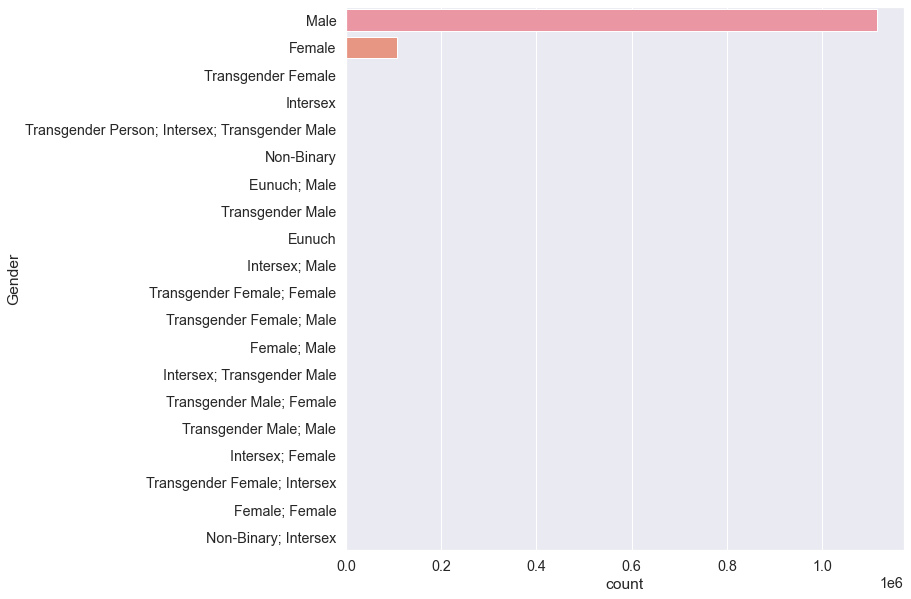

In [20]:
sns.countplot(y='Gender' , data=df )

In [21]:
df.isnull().sum()/df.shape [0] *100

Name             0.000000
Gender           0.000000
Country         27.433062
Occupation      16.918396
Birth year       0.000000
Death year       0.000000
Age of death     0.000000
dtype: float64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223006 entries, 0 to 1223008
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Name          1223006 non-null  object 
 1   Gender        1223006 non-null  object 
 2   Country       887498 non-null   object 
 3   Occupation    1016093 non-null  object 
 4   Birth year    1223006 non-null  int64  
 5   Death year    1223006 non-null  float64
 6   Age of death  1223006 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 74.6+ MB


In [23]:
df.columns

Index(['Name', 'Gender', 'Country', 'Occupation', 'Birth year', 'Death year',
       'Age of death'],
      dtype='object')

In [24]:
df['Birth year'].max()

2016

<AxesSubplot:xlabel='Birth year', ylabel='Density'>

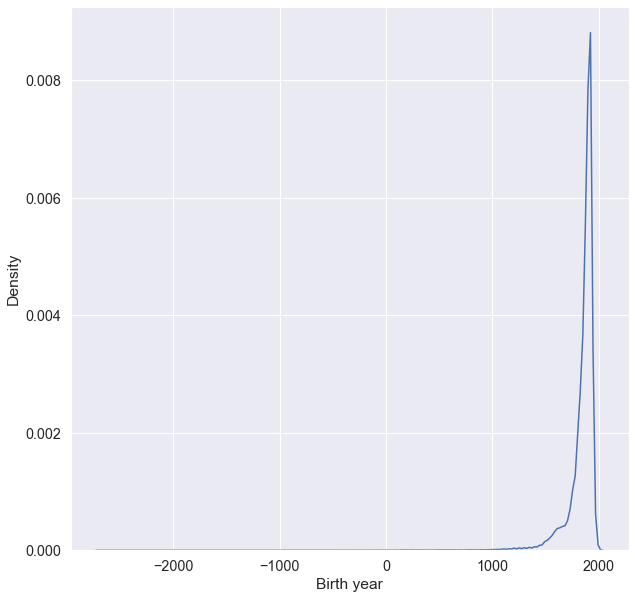

In [25]:
sns.kdeplot(x='Birth year', data= df)

In [26]:
df['Birth year'].min()

-2700

In [27]:
df[df['Birth year']==df['Birth year'].min()]

,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
126524,Merit-Ptah,Female,NaN,Physician,-2700,-2659.0,41.0


## about_Merit-Ptah_live https://en.wikipedia.org/wiki/Merit-Ptah
## the outliers here its real i will not remove any 

In [28]:
df['Death year'].max()

2021.0

In [29]:
df['Death year'].min()

-2659.0

In [30]:
df[df['Death year']==df['Death year'].min()]

,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
126524,Merit-Ptah,Female,NaN,Physician,-2700,-2659.0,41.0


In [31]:
df['Age of death'].max()

169.0

In [32]:
df['Birth year'] = df['Birth year'].astype('int')
df['Death year'] = df['Death year'].astype('int')
df['Age of death'] = df['Age of death'].astype('int')

## categorical futures

#### i'm gonna modify these columns becouse it contains more than one form of the name of one country, and that follows changes according to time  
####  *( i'm sure this not the best way ) .

In [33]:
df['Country'].unique()

array(['United States of America; Kingdom of Great Britain',
       'United Kingdom', 'United States of America', ...,
       'El Salvador; Prussia; German Empire; North German Confederation',
       'Syria; State of Syria; Syrian Republic',
       'El Salvador; British Empire'], dtype=object)

In [34]:
def country_mod (country):
    if country == 'United Kingdom; United Kingdom of Great Britain and Ireland' :
        return 'United Kingdom of Great Britain and Ireland'
    elif country == 'Kingdom of Great Britain; United Kingdom of Great Britain and Ireland':
        return 'United Kingdom of Great Britain and Ireland'
    elif country == 'Kingdom of Great Britain; Kingdom of England':
        return 'United Kingdom of Great Britain and Ireland'
   
    elif country == 'Kingdom of Great Britain; United Kingdom of Great Britain and Ireland; Kingdom of Ireland' :
        return 'Ireland'
    elif country == 'Ireland; Irish Free State' :
        return 'Ireland'
    elif country == 'Kingdom of Ireland' :
        return 'Ireland'
    elif country == 'Ireland; United States of America' :
        return 'Ireland'
    elif country == 'Ireland; United Kingdom of Great Britain and Ireland' :
        return 'Ireland'
    
    elif country == 'Wales; United Kingdom; United Kingdom of Great Britain and Ireland' :
        return 'Wales'
    elif country == 'Wales; United Kingdom' :
        return 'Wales'
    elif country == 'Wales; United Kingdom of Great Britain and Ireland' :
        return 'Wales'

    elif country == 'Austria; Austria-Hungary':
        return 'Austria'
    elif country == 'Austria; Germany':
        return 'Austria'
    elif country == 'Austria-Hungary' :
        return 'Austria'
    elif country == 'Austrian Empire':
        return 'Austria'
    elif country == 'Austria-Hungary; Austrian Empire':
        return 'Austria'
    elif  country == 'Austria-Hungary; Kingdom of Yugoslavia':
        return 'Austria'
    elif country == 'Austria-Hungary; Socialist Federal Republic of Yugoslavia; Kingdom of Yugoslavia' :
        return 'Austria'
    elif country == 'United States of America; Austria' :
        return 'Austria'

    elif country == 'Australia; United Kingdom of Great Britain and Ireland':
        return 'Australia'
    elif country == 'United Kingdom; Australia; United Kingdom of Great Britain and Ireland' :
        return 'Australia'
    elif country == 'United Kingdom; Australia' :
        return 'Australia'

    elif country == 'Italy; Kingdom of Italy' :
        return 'Italy'
    elif country == 'Kingdom of Italy' :
        return 'Italy'
    elif country == 'United States of America; Italy; Kingdom of Italy' :
        return 'Italy'
    elif country == 'ancient Rome':
        return 'Italy'
    
    elif country == 'Soviet Union; Russian Empire' :
        return 'Russia'
    elif country == 'Russia; Soviet Union':
        return 'Russia' 
    elif country == 'Russian Empire' :
        return 'Russia'
    elif country =='Russia; Soviet Union; Russian Empire' :
        return 'Russia'
    elif country == 'Russian Empire; Polish–Lithuanian Commonwealth':
        return 'Russia'
    elif country == 'Russian Soviet Federative Socialist Republic; Soviet Union; Russian Empire' :
        return 'Russia'
    elif country == 'Soviet Union; Russian Empire; Russian Soviet Federative Socialist Republic' :
        return 'Russia'
    elif country == 'Tsardom of Russia' :
        return 'Russia'
    elif country == 'Russian Soviet Federative Socialist Republic; Russian Empire' :
        return 'Russia'

    elif country == 'Germany; German Democratic Republic' :
        return 'Germany'
    elif country == 'German Empire' :
        return 'Germany'
    elif country == 'German Reich' :
        return 'Germany'
    elif country == 'German Democratic Republic' :
        return 'Germany'
    elif country == 'Nazi Germany; German Empire; West Germany' :
        return 'Germany'
    elif country == 'Nazi Germany' :
        return 'Germany'
    elif country == 'Germany; Kingdom of Prussia' :
        return 'Germany'
    elif country == 'United Kingdom; Germany':
        return 'Germany'
    elif country == 'Nazi Germany; Weimar Republic; German Empire' :
        return 'Germany'
    elif country == 'Germany; Israel' :
        return 'Germany'
        
    elif country == 'Poland; Russian Empire':
        return 'Poland'

    elif country == 'Austria-Hungary; Czechoslovakia' :
        return 'Czechoslovakia'
    elif country == 'Czech Republic; Czechoslovakia' :
        return 'Czechoslovakia'
    elif country == 'Slovakia; Czechoslovakia' :
        return 'Czechoslovakia'
    
    
    elif country == "People's Republic of China" :
        return 'China'
    elif country == "People's Republic of China; Republic of China (1912–1949)" :
        return 'China'
    elif country == "Republic of China (1912–1949)" :
        return 'China'
    elif country == 'Qing dynasty; Republic of China (1912–1949)' :
        return 'China'
    elif country == "People's Republic of China; Qing dynasty; Republic of China (1912–1949)" :
        return 'China'

    elif country == 'Dutch Republic':
        return 'Holland'
    
    elif country == 'Kingdom of France':
        return 'France'
    elif country == 'France; Germany' :
        return 'France'
    elif country == 'France; Russian Empire' :
        return 'France'
        
    elif country == 'Canada; United States of America' :
        return 'Canada'

    elif country == 'Switzerland; Germany' :
        return 'Switzerland'
    elif country == 'Switzerland; France' :
        return 'Switzerland'
    elif country == 'United States of America; Switzerland' :
        return 'Switzerland'
    
    elif country == 'Slovenia; Socialist Federal Republic of Yugoslavia' :
        return 'Slovenia'
    elif country == 'Slovenia; Austria-Hungary; Socialist Federal Republic of Yugoslavia; Kingdom of Yugoslavia':
        return 'Slovenia'
    
    elif country == 'United States of America; United Kingdom':
        return 'United States of America'
    elif country == 'United States of America; France':
        return 'United States of America'
    elif country == 'United States of America; Russian Empire' :
        return 'United States of America'
    elif country == 'United States of America; United Kingdom of Great Britain and Ireland' :
        return 'United States of America'
    elif country == 'United States of America; United Kingdom; United Kingdom of Great Britain and Ireland' :
        return 'United States of America'
    elif country == 'United States of America; Soviet Union':
        return 'United States of America'
    elif country == 'Norway; United States of America' :
        return 'United States of America'
        
    elif country == 'Belarus; Soviet Union':
        return 'Belarus'
    
    elif country == 'Estonia; Soviet Union':
        return 'Estonia'
    
    elif country == 'Finland; Sweden' :
        return 'Finland'
    
    elif country == 'Poland; Germany' :
        return 'Poland'
    elif country == 'United States of America; Poland' :
        return 'Poland'
    elif country == 'Poland; France':
        return 'Poland'
    elif country == 'Kingdom of Poland' :
        return 'Poland'
    
    elif country == 'Hungary; United States of America' :
        return 'Hungary'
    
    elif country == 'Grand Duchy of Lithuania; Polish–Lithuanian Commonwealth' :
        return 'Lithuania'
    elif country == 'Grand Duchy of Lithuania':
        return 'Lithuania'
    elif country == 'Lithuania; Soviet Union' :
        return 'Lithuania'
    
    elif country == 'Spain; Argentina' :
        return 'Argentina'
    
    elif country == 'Sweden; Germany' :
        return 'Sweden'
    elif country == 'United States of America; Sweden':
        return 'Sweden'
    
    elif country == 'Belgium; Kingdom of the Netherlands' :
        return 'Belgium'
    elif country == 'Belgium; France' :
        return 'Belgium'
    
    elif country == 'Spain; Mexico' :
        return 'Spain'
    elif country == 'Spain; France' :
        return 'Spain'
    
    elif country == 'Armenia; Soviet Union' :
        return 'Armenia'
    
    elif country == 'Denmark; Germany' :
        return 'Denmark'
    
    elif country == 'Kingdom of Sardinia; Kingdom of Italy' :
        return 'Sardinia'
    elif country == 'Kingdom of Sardinia' :
        return 'Sardinia'
    
    elif country == 'Australia; New Zealand' :
        return 'New Zealand'
    
    elif country == 'Georgia; Soviet Union' :
        return 'Georgia'
    
    elif country == 'Turkey; Ottoman Empire' :
        return 'Turkey'
    
    elif country == 'Socialist Federal Republic of Yugoslavia; Kingdom of Yugoslavia' :
        return 'Yugoslavia'
    elif country == 'Kingdom of Yugoslavia' :
        return 'Yugoslavia'
    elif country == 'Austria-Hungary; Yugoslavia' :
        return 'Yugoslavia'
    elif country == 'Austria-Hungary; Socialist Federal Republic of Yugoslavia' :
        return 'Yugoslavia'
    
    elif country == 'Greece; Ottoman Empire' :
        return 'Greece'
    else :
        return country

In [35]:
df['Country']= df['Country'].apply(country_mod)

In [36]:
df['Country'].value_counts().head(170)

United States of America                                153864
Germany                                                 101759
France                                                   79458
United Kingdom of Great Britain and Ireland              57386
Italy                                                    32410
                                                         ...  
Kingdom of Italy; Kingdom of the Two Sicilies               81
Austria-Hungary; Kingdom of Italy                           81
Irish Free State                                            79
United States of America; Kingdom of the Netherlands        77
Papal States; Kingdom of Italy                              77
Name: Country, Length: 170, dtype: int64

In [37]:
top10_country = df['Country'].value_counts()
top10=top10_country.head(10)
top10.index

Index(['United States of America', 'Germany', 'France',
       'United Kingdom of Great Britain and Ireland', 'Italy', 'Sweden',
       'Spain', 'Canada', 'United Kingdom', 'Poland'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States of America'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'France'),
  Text(3, 0, 'United Kingdom of Great Britain and Ireland'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Sweden'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'Poland')])

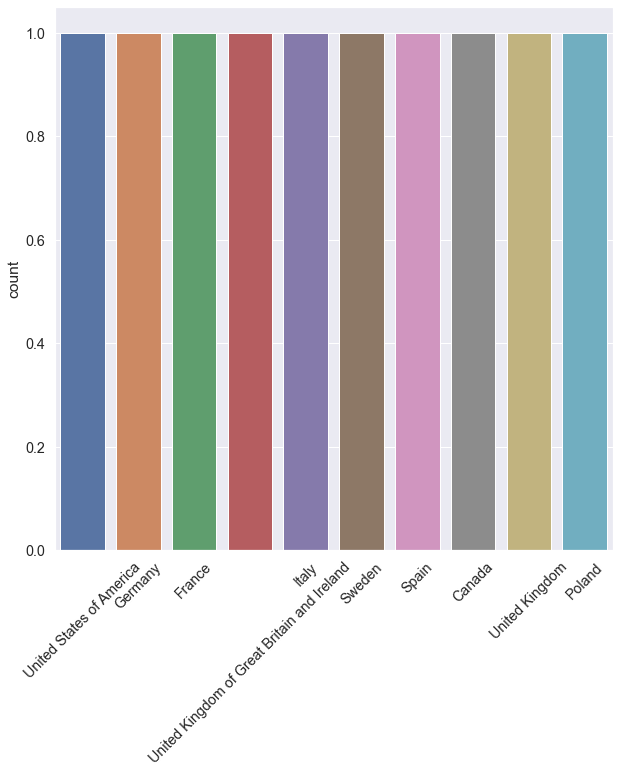

In [38]:
sns.countplot(x=top10.index, data=df)
plt.xticks(rotation=45)

In [39]:
df['Age of death'].mean()

69.27405343882205

In [40]:
df['Age of death'].mode()

0    80
dtype: int32

In [41]:
df['Occupation'].unique().tolist()

['Politician',
 'Artist',
 'Egyptologist',
 'Astronomer',
 'Ruler',
 'Statesperson',
 'Regent',
 'Athlete',
 'Researcher',
 'Official; french resistance fighter',
 'Sovereign',
 'Playwright',
 'Military personnel',
 'Philosopher',
 'Businessperson',
 'Game designer; role-playing game designer',
 'Explorer',
 'Architect',
 'Teacher',
 'Activist',
 'Aristocrat',
 'Racing automobile driver',
 'Entrepreneur',
 'Motorcycle racer; formula one driver',
 'Formula one driver',
 'Journalist',
 'Geographer; explorer',
 'Monarch',
 'Business executive',
 'Racing automobile driver; formula one driver',
 'Engineer',
 'Farmer; formula one driver',
 'Author',
 'Hammer thrower',
 nan,
 'Religious figure',
 'Resistance fighter',
 'Sailor',
 'Monk; ascetic',
 'Condottiero',
 'Puppeteer',
 'Privateer; pirate',
 'Navigator; explorer',
 'Sailor; explorer',
 'Cartographer; naval officer; explorer; seafarer',
 'Conquistador; governor; explorer',
 'Homekeeper',
 'Student',
 'Official',
 'Nutritionist',
 'Molec

In [42]:
df['Occupation'].value_counts()

Artist                     281512
Politician                 195390
Athlete                    110943
Researcher                  90709
Military personnel          52910
                            ...  
Socialite; heiress              1
Biologist; explorer             1
Perfumer; art collector         1
Condottiero; magistrate         1
Tailor; model                   1
Name: Occupation, Length: 9313, dtype: int64

In [43]:
df['Occupation'].value_counts().head(20)

Artist                281512
Politician            195390
Athlete               110943
Researcher             90709
Military personnel     52910
Religious figure       37086
Businessperson         19528
Architect              17865
Journalist             16002
Teacher                15693
Physician              13253
Engineer               13160
Judge                   8454
Lawyer                  7184
Jurist                  4601
Aristocrat              3670
Entrepreneur            2926
Philosopher             2819
Translator              2742
Publisher               2475
Name: Occupation, dtype: int64

## Reset_index 

In [44]:
df.reset_index(drop= False, inplace= True)
df

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
0,0,George Washington,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799,67
1,1,Douglas Adams,Male,United Kingdom,Artist,1952,2001,49
2,2,Abraham Lincoln,Male,United States of America,Politician,1809,1865,56
3,3,Wolfgang Amadeus Mozart,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791,35
4,4,Ludwig van Beethoven,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827,57
...,...,...,...,...,...,...,...,...
1223001,1223004,Marie-Fortunée Besson,Male,France,Tailor; model,1907,1996,89
1223002,1223005,Ron Thorsen,Male,Canada,Athlete,1948,2004,56
1223003,1223006,Diether Todenhagen,Male,Germany,Military personnel,1920,1944,24
1223004,1223007,Reginald Oswald Pearson,Male,United Kingdom,Artist,1887,1915,28


In [45]:
df.isnull().sum()/df.shape [0] *100

index            0.000000
Name             0.000000
Gender           0.000000
Country         27.433062
Occupation      16.918396
Birth year       0.000000
Death year       0.000000
Age of death     0.000000
dtype: float64

In [46]:
df['Country'].value_counts().head(5)

United States of America                       153864
Germany                                        101759
France                                          79458
United Kingdom of Great Britain and Ireland     57386
Italy                                           32410
Name: Country, dtype: int64

In [47]:
df['Country'].value_counts().tail(5)

Nazi Germany; Socialist Federal Republic of Yugoslavia    1
Lithuania; Belarus                                        1
Spain; Kingdom of England                                 1
France; United Kingdom; Russian Empire                    1
El Salvador; British Empire                               1
Name: Country, dtype: int64

# questions

#### 1- average age of death .
#### 2- the top 5 occupation for the transgender . 
#### 3- The 5 largest countries in terms of number.
#### 4- The first transgender woman and man in history .  
#### 5-how many person died in 2021 .
#### 6- the oldest person in this data . 
#### 7- Find the row of Jesus Christ .
#### 8-  Section the data for the BC and each century separately, and find the average age at death, the oldest age, and the largest 5 countries in number .
#### 9- how many person in the data died between 10:20 and how many person for each 10 above .
#### 10- how many person died after age 120 .



### the answers
#### 1- average age of death .

In [48]:
df['Age of death'].median()

72.0

In [49]:
df['Age of death'].mode()

0    80
dtype: int32

#### 2- the top 5 occupation for the transgender . 

In [50]:
def gender_mod(gender) :
    if gender=='Male':
        return gender
    elif gender == 'Female':
        return gender
    else :
        return 'transgender'

In [51]:
df['mod_gender']= df['Gender'].apply(gender_mod)
df['mod_gender'].value_counts()

Male           1115009
Female          107829
transgender        168
Name: mod_gender, dtype: int64

In [52]:
trans=df[df['mod_gender']=='transgender']

In [53]:
trans['Occupation'].value_counts().head(5)

Artist                60
Politician            17
Military personnel    10
Researcher             7
Athlete                7
Name: Occupation, dtype: int64

In [54]:
df.drop('mod_gender',axis=1, inplace= True)

#### 3- The 5 largest countries in terms of number .

In [55]:
df['Country'].value_counts().head(5)

United States of America                       153864
Germany                                        101759
France                                          79458
United Kingdom of Great Britain and Ireland     57386
Italy                                           32410
Name: Country, dtype: int64

In [56]:
df['Country'].value_counts().head(5).index

Index(['United States of America', 'Germany', 'France',
       'United Kingdom of Great Britain and Ireland', 'Italy'],
      dtype='object')

#### 4- The first transgender woman and man in history . 

In [57]:
df[df['Name']=='Christine Jorgensen']

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
42663,42664,Christine Jorgensen,Transgender Female,United States of America,Artist,1926,1989,63


In [58]:
df[df['Name']=='Michael Dillon']

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
794210,794211,Michael Dillon,Transgender Male,United Kingdom of Great Britain and Ireland,Physician,1915,1962,47


### https://en.wikipedia.org/wiki/Christine_Jorgensen  the _frist_transgender_woman
### https://en.wikipedia.org/wiki/Michael_Dillon  the_frist transgender_man

#### 5-how many person died in 2021 .

In [59]:
df[df['Death year']==df['Death year'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
710,711,Dean Ho,Male,United States of America,Professional wrestler; amateur wrestler,1940,2021,81
1838,1839,Ryszard Szurkowski,Male,Poland,Athlete,1946,2021,75
3338,3339,Yury Vlasov,Male,Russia,Artist,1935,2021,86
3355,3356,Ludwig Fels,Male,Germany,Artist,1946,2021,75
3364,3365,Jacques Crickillon,Male,Belgium,Artist,1940,2021,81
...,...,...,...,...,...,...,...,...
1211351,1211354,John Land,Male,NaN,Athlete,1938,2021,83
1211368,1211371,Bogdan Macovei,Male,NaN,Athlete,1953,2021,68
1212026,1212029,Pierre Lherminier,Male,France,Researcher,1931,2021,90
1213763,1213766,Hilde de Haan,Male,NaN,Architect,1949,2021,72


In [60]:
df[df['Death year']==df['Death year'].max()].shape[0]

1955

#### 6- the oldest person in this data . 

In [61]:
df[df['Age of death']==df['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
498724,498725,Henry Jenkins,Male,NaN,NaN,1501,1670,169


### https://en.wikipedia.org/wiki/Henry_Jenkins_(longevity_claimant) _the_Oldest_man

#### 7- Find the row of Jesus Christ .

In [62]:
df.loc[(df['Age of death']== 34) & (df['Birth year']== -1)]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
3495,3496,historical Jesus,Male,NaN,Carpenter; preacher; social activist; nan,-1,33,34


#### 8-  Section the data for the BC and each century separately, and find the average age at death, the oldest age, and the largest 5 countries in number .

### * BC and the first century .

In [63]:
df100 = df[df['Death year']<= 100]
df100

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
45,45,Cleopatra,Female,Ancient Egypt,Sovereign,-69,-30,39
68,68,Plato,Male,Classical Athens,Artist,-427,-347,80
70,70,Aristotle,Male,NaN,Philosopher,-384,-322,62
76,76,Socrates,Male,Classical Athens,Philosopher,-470,-399,71
161,161,Ramesses II,Male,Ancient Egypt,Statesperson,-1303,-1213,90
...,...,...,...,...,...,...,...,...
910006,910007,Lucius Livineius Regulus,Male,NaN,Politician,-105,-41,64
928746,928747,Marcus Tullius Cicero,Male,NaN,NaN,-200,-106,94
1038091,1038094,冯鲂,Male,NaN,NaN,-1,85,86
1091202,1091205,楊終,Male,NaN,Artist,50,100,50


In [64]:
df100['Age of death'].min()

0

In [65]:
df100.median()['Age of death']

54.0

In [66]:
df100[df100['Age of death']==df100['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
37698,37699,Agis II,Male,Sparta,Ruler,-500,-401,99
44313,44314,"Joanna, wife of Chuza",Female,NaN,NaN,1,100,99
47396,47397,Cyrus the Younger,Male,NaN,Military personnel,-500,-401,99
121652,121653,Yi Yin,Male,Shang dynasty,Politician,-1648,-1549,99
252205,252206,Anthony of Apamea,Male,NaN,NaN,1,100,99
357977,357978,Irene of Lecce,Male,NaN,NaN,1,100,99
648753,648754,Zhan Huo,Male,NaN,Politician,-720,-621,99
677154,677155,鄧晨,Male,NaN,NaN,-50,49,99


In [67]:
df100['Country'].value_counts().head(5)

China                  49
Western Han Dynasty    33
Ancient Egypt          23
Italy                  22
Seleucid Empire        22
Name: Country, dtype: int64

### * second century .

In [68]:
df200 = df[(df['Death year']<= 200) & (df['Death year']> 100)]
df200

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
543,544,Emperor He of Han,Male,Eastern Han Dynasty,Monarch,79,106,27
544,545,Emperor An of Han,Male,Eastern Han Dynasty,Monarch,94,125,31
547,548,Emperor Shun of Han,Male,Eastern Han Dynasty,Ruler,115,144,29
549,550,Emperor Huan of Han,Male,Eastern Han Dynasty,Monarch,132,168,36
551,552,Emperor Ling of Han,Male,Eastern Han Dynasty,Artist,156,189,33
...,...,...,...,...,...,...,...,...
911710,911711,Liang Shang,Male,NaN,Politician,70,141,71
929778,929779,Larcius Macedo,Male,Italy,NaN,50,108,58
996043,996045,Papirius Dionysius,Male,NaN,NaN,150,191,41
1040788,1040791,Alexandre de Baccano,Male,NaN,NaN,90,143,53


In [69]:
df200[df200['Age of death']==df200['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
66714,66715,Matteya ben Heresh,Male,NaN,Rabbi,101,200,99
106695,106696,Simeon ben Zoma,Male,NaN,Rabbi,101,200,99
120402,120403,Gan Ji,Male,China,Physician,101,200,99
127053,127054,Haninah,Male,Israel,Rabbi,101,200,99
128191,128192,Xu Gong,Male,China,Politician,101,200,99
151237,151238,Tian Feng,Male,China,Politician,101,200,99
158116,158117,Wen Chou,Male,China,Military personnel,101,200,99
292045,292046,Tiberius Julius Eupator,Male,NaN,Monarch,101,200,99


In [70]:
df200.median()['Age of death']

53.0

In [71]:
df200['Country'].value_counts().head(5)

Eastern Han Dynasty           41
China                         33
Italy                         16
Egypt                          4
China; Eastern Han Dynasty     3
Name: Country, dtype: int64

### * third century .

In [72]:
df300 = df[(df['Death year']<= 300) & (df['Death year']>200)]
df300

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
560,561,Emperor Xian of Han,Male,Eastern Han Dynasty,Monarch,181,234,53
576,577,Emperor Wu of Jin,Male,Western Jin dynasty,Ruler,236,290,54
1272,1273,Jia Chong,Male,China; Cao Wei,Politician,217,282,65
1273,1274,Lawrence of Rome,Male,Italy,Deacon,225,258,33
6164,6165,Empress Yang Zhi,Female,China,NaN,259,292,33
...,...,...,...,...,...,...,...,...
1010252,1010255,Lộ Túy,Male,NaN,NaN,150,214,64
1057355,1057358,Quirinus of Tegernsee,Male,NaN,Martyr,250,270,20
1064491,1064494,Saint Thyrsus,Male,NaN,Deacon,200,251,51
1077344,1077347,Lady Sun,Male,NaN,NaN,194,265,71


In [73]:
df300[df300['Age of death']==df300['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
40712,40713,Saint Apollonia,Female,NaN,Martyr,150,249,99
88482,88483,Jiang Ji,Male,China,Politician,150,249,99
159098,159099,Trophimus of Arles,Male,France,Religious figure,201,300,99
161034,161035,Johanan bar Nappaha,Male,NaN,Rabbi,180,279,99
254218,254219,Apollonius of Ephesus,Male,NaN,Religious figure,201,300,99
268173,268174,Maturinus,Male,France,Religious figure,201,300,99
460120,460121,Empress Huyan,Female,NaN,NaN,201,300,99


In [74]:
df300.median()['Age of death']

52.0

In [75]:
df300['Country'].value_counts().head(5)

China                  127
Eastern Han Dynasty     50
Italy                   30
Cao Wei                 15
China; Cao Wei          11
Name: Country, dtype: int64

### * fourth century.

In [76]:
df400 = df[(df['Death year']<= 400) & (df['Death year']>300)]
df400

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
577,578,Emperor Hui of Jin,Male,Western Jin dynasty,Official,259,307,48
578,579,Sima Lun,Male,Western Jin dynasty,Politician,240,301,61
579,580,Emperor Huai of Jin,Male,China; Western Jin dynasty,Monarch,300,313,13
582,583,Emperor Min of Jin,Male,China,Politician,300,318,18
583,584,Emperor Yuan of Jin,Male,Eastern Jin dynasty,Monarch,276,323,47
...,...,...,...,...,...,...,...,...
998692,998695,Marco di Eca,Male,NaN,Religious figure,266,328,62
1082057,1082060,Tuoba Pugen,Male,Northern Wei,NaN,250,316,66
1082058,1082061,Tuoba Shi,Male,Northern Wei,NaN,350,371,21
1126546,1126549,Sima Xu,Male,NaN,Politician,250,301,51


In [77]:
df400[df400['Age of death']==df400['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
76575,76576,Syrus of Pavia,Male,NaN,Religious figure,301,400,99
122474,122475,Fan Changsheng,Male,China,Politician,219,318,99
126678,126679,Severus of Naples,Male,NaN,Religious figure,301,400,99
397819,397820,Abraham Kidunaia,Male,NaN,Religious figure,267,366,99
460111,460112,Empress Dowager Li Lingrong,Female,China,NaN,301,400,99
460115,460116,Empress Duan,Female,NaN,Politician,301,400,99
460148,460149,Empress Zhang,Female,NaN,NaN,250,349,99
464451,464452,Fan Wen,Male,Champa,NaN,250,349,99


In [78]:
df400.median()['Age of death']

53.0

In [79]:
df400['Country'].value_counts().head(5)

China                         50
Italy                         28
China; Eastern Jin dynasty    11
Egypt                          9
Byzantine Empire               6
Name: Country, dtype: int64

### * 5th century .

In [80]:
df500 = df[(df['Death year']<= 500) & (df['Death year']>400)]
df500

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
592,593,Emperor An of Jin,Male,China,Monarch,382,419,37
593,594,Emperor Gong of Jin,Male,China,Military personnel,386,421,35
699,700,Augustine of Hippo,Male,Italy,Researcher,354,430,76
2255,2256,Attila,Male,NaN,Tribal chief,406,453,47
2671,2672,John Chrysostom,Male,Byzantine Empire,Artist,349,407,58
...,...,...,...,...,...,...,...,...
983188,983190,Xiao Huikai,Male,NaN,NaN,423,471,48
1038095,1038098,酈範,Male,NaN,NaN,428,489,61
1081918,1081921,Liu Yikang,Male,Liu Song dynasty,NaN,409,451,42
1081931,1081934,Bi Zhongjing,Male,Northern Wei,NaN,450,491,41


In [81]:
df500[df500['Age of death']==df500['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
73140,73141,Jangsu,Male,Goguryeo,Artist,394,491,97
182779,182780,Gao Yun,Male,NaN,Politician,390,487,97
270091,270092,Volusianus of Tours,Male,France,Religious figure,401,498,97


In [82]:
df500.median()['Age of death']

48.0

In [83]:
df500['Country'].value_counts().head(5)

China               26
Italy               21
Northern Wei        19
Byzantine Empire    15
Liu Song dynasty    10
Name: Country, dtype: int64

### * sixth century . 

In [84]:
df600 = df[(df['Death year']<= 600) & (df['Death year']>500)]
df600

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
1860,1861,Chlothar I,Male,NaN,Monarch,498,561,63
2016,2017,Fan Zhen,Male,NaN,Philosopher,450,515,65
2161,2162,Abdullah ibn Abdul-Muttalib,Male,NaN,Merchant,545,570,25
2589,2590,Justinian I,Male,Byzantine Empire,Politician,482,565,83
2770,2771,Benedict of Nursia,Male,NaN,Religious figure,480,547,67
...,...,...,...,...,...,...,...,...
1082059,1082062,Emperor Gong of Western Wei,Male,Western Wei,Politician,537,557,20
1091219,1091222,彭乐,Male,NaN,Politician,525,551,26
1094986,1094989,Gregorio de Osset,Male,NaN,NaN,500,544,44
1207047,1207050,李士謙,Male,Sui dynasty,Hermit,523,588,65


In [85]:
df600[df600['Age of death']==df600['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
61360,61361,Stephan of Byzantium,Male,Byzantine Empire,Researcher,501,600,99
121565,121566,Herculanus of Perugia,Male,NaN,Religious figure,450,549,99
330472,330473,Peter of Canterbury,Male,NaN,Religious figure,501,600,99
359556,359557,Ilario di Javols,Male,France,Prelate,501,600,99
516751,516752,Yang Liang,Male,NaN,Military personnel,501,600,99


In [86]:
df600.median()['Age of death']

56.0

In [87]:
df600['Country'].value_counts().head(5)

Byzantine Empire    38
Chen dynasty        13
Northern Wei        12
Northern Zhou       11
Sui dynasty          8
Name: Country, dtype: int64

### * seventh century . 

In [88]:
df700 = df[(df['Death year']<= 700) & (df['Death year']>600)]
df700

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
599,600,Emperor Wen of Sui,Male,Sui dynasty; China,Politician,541,604,63
600,601,Emperor Yang of Sui,Male,Sui dynasty,Artist,569,617,48
601,602,Emperor Gong of Sui,Male,Sui dynasty; Tang Empire,Sovereign,605,619,14
602,603,Yang Tong,Male,Sui dynasty; Tang Empire,Politician,605,619,14
725,726,Umar ibn Al-Khattāb,Male,Rashidun Caliphates,Statesperson,585,644,59
...,...,...,...,...,...,...,...,...
1082030,1082033,Chuluo Khan,Male,NaN,NaN,550,620,70
1082060,1082063,Murong Nuohebo,Male,NaN,Politician,624,688,64
1112889,1112892,Thomas of Harqel,Male,NaN,Religious figure,550,601,51
1170249,1170252,Sinan Bin Salamah bin Mohbik,Male,NaN,Governor,628,673,45


In [89]:
df700[df700['Age of death']==df700['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
1752,1753,Wu Youning,Male,Tang Empire,Military personnel,601,700,99
264207,264208,Ado of Friuli,Male,Republic of Venice,Aristocrat,601,700,99
331415,331416,Constantius of Capri,Male,NaN,Religious figure,601,700,99


In [90]:
df700.median()['Age of death']

61.0

In [91]:
df700['Country'].value_counts().head(5)

Tang Empire            101
Byzantine Empire        33
Rashidun Caliphates     26
Sui dynasty             15
France                   9
Name: Country, dtype: int64

### * 8th century .

In [92]:
df800 = df[(df['Death year']<= 800) & (df['Death year']>700)]
df800

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
263,263,Charles Martel,Male,Francia,Military personnel,688,741,53
496,497,Li Bai,Male,Tang Empire,Artist,701,762,61
816,817,Emperor Zhongzong of Tang,Male,Tang Empire,Monarch,656,710,54
817,818,Emperor Ruizong of Tang,Male,Tang Empire,Sovereign,662,716,54
819,820,Wu Zetian,Female,Tang Empire; Zhou dynasty (690–705),Artist,624,705,81
...,...,...,...,...,...,...,...,...
1047505,1047508,Joseph of Antioch,Male,NaN,NaN,701,792,91
1057865,1057868,Saïd ibn Abd-ar-Rahman al-Jumahí,Male,NaN,Judge,722,792,70
1081986,1081989,Lu Jinlan,Male,Tang Empire,NaN,787,800,13
1202005,1202008,Tobias,Male,NaN,Religious figure,700,726,26


In [93]:
df800[df800['Age of death']==df800['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
65288,65289,Germanus I of Constantinople,Male,Byzantine Empire,Artist,634,733,99
269543,269544,Adalbert,Male,France,Religious figure,701,800,99
297733,297734,George of Amastris,Male,Byzantine Empire,Religious figure,701,800,99
310315,310316,Tilpin,Male,France,Religious figure,701,800,99
637578,637579,Wei Zhiyi,Male,Tang Empire,Politician,701,800,99


In [94]:
df800.median()['Age of death']

60.0

In [95]:
df800['Country'].value_counts().head(5)

Tang Empire          147
Byzantine Empire      30
Umayyad Caliphate     19
Germany               13
Japan                 12
Name: Country, dtype: int64

### * 9th century .

In [96]:
df900 = df[(df['Death year']<= 900) & (df['Death year']>800)]
df900

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
240,240,Charlemagne,Male,Carolingian Empire,Monarch,748,814,66
446,447,Abu Nuwas,Male,Abbasid Caliphate,Artist,756,814,58
692,693,Rurik,Male,NaN,Statesperson,830,879,49
824,825,Emperor Dezong of Tang,Male,Tang Empire,Artist,742,805,63
825,826,Emperor Shunzong of Tang,Male,Tang Empire,Calligrapher,761,806,45
...,...,...,...,...,...,...,...,...
983594,983596,Dou Mou,Male,NaN,Artist,749,822,73
1002858,1002861,Gisela,Female,NaN,Politician,830,860,30
1049660,1049663,George the Standard-Bearer,Male,Byzantine Empire,Religious figure,776,821,45
1081979,1081982,Cui Qiu,Male,Tang Empire,Military personnel,850,883,33


In [97]:
df900[df900['Age of death']==df900['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
87258,87259,Grimoald III of Benevento,Male,NaN,NaN,701,806,105


In [98]:
df900.median()['Age of death']

60.0

In [99]:
df900['Country'].value_counts().head(5)

Tang Empire          131
Abbasid Caliphate     48
Byzantine Empire      34
Germany               15
Japan                 14
Name: Country, dtype: int64

### * tenth century .

In [100]:
df1000 = df[(df['Death year']<= 1000) & (df['Death year']>900)]
df1000

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
358,358,Emperor Taizu of Liao,Male,Liao dynasty,Aristocrat,872,926,54
359,359,Emperor Taizong of Liao,Male,Liao dynasty,Aristocrat,902,947,45
360,360,Emperor Shizong of Liao,Male,Liao dynasty,Aristocrat,919,951,32
361,362,Emperor Muzong of Liao,Male,Liao dynasty,Aristocrat,931,969,38
362,363,Emperor Jingzong of Liao,Male,Liao dynasty,Aristocrat,948,982,34
...,...,...,...,...,...,...,...,...
1072204,1072207,Ali ibn Muhammad al-Iyadi,Male,Fatimid caliphate,Artist,950,976,26
1081941,1081944,Wang Yansi,Male,Min,Teacher,872,966,94
1205236,1205239,Lady Pan,Male,NaN,NaN,968,989,21
1209815,1209818,Ahmad ibn Ishaq al-Tanukhi,Male,NaN,Artist,845,930,85


In [101]:
df1000[df1000['Age of death']==df1000['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
450011,450012,Empress Zhou,Female,Former Shu,NaN,801,918,117


In [102]:
df1000.median()['Age of death']

54.0

In [103]:
df1000['Country'].value_counts().head(5)

Song dynasty         42
Byzantine Empire     36
Germany              33
Abbasid Caliphate    29
Norway               18
Name: Country, dtype: int64

### * eleventh century .

In [104]:
df1100 = df[(df['Death year']<= 1100) & (df['Death year']>1000)]
df1100

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
297,297,Adémar de Chabannes,Male,France,Researcher,989,1034,45
363,364,Emperor Shengzong of Liao,Male,Liao dynasty,Aristocrat,972,1031,59
364,365,Emperor Xingzong of Liao,Male,Liao dynasty,Aristocrat,1016,1055,39
608,609,Emperor Jingzong of Western Xia,Male,Western Xia,Politician,1003,1048,45
610,611,Emperor Yizong of Western Xia,Male,Western Xia,Politician,1047,1068,21
...,...,...,...,...,...,...,...,...
1158142,1158145,Ibn Mahrayazd,Male,NaN,Faqih,977,1067,90
1161688,1161691,Elvira Mendez de Faro,Female,NaN,NaN,1050,1100,50
1205235,1205238,Empress Guo,Male,NaN,NaN,975,1007,32
1210739,1210742,Heinrich von Scharfenberg,Male,NaN,Religious figure,1050,1072,22


In [105]:
df1100[df1100['Age of death']==df1100['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
6144,6145,Otto III,Male,Germany,NaN,950,1057,107


In [106]:
df1100.median()['Age of death']

54.0

In [107]:
df1100['Country'].value_counts().head(5)

Song dynasty        93
France              80
Germany             78
Byzantine Empire    55
Norway              23
Name: Country, dtype: int64

### * the twelfth century . 

In [108]:
df1200 = df[(df['Death year']<= 1200) & (df['Death year']>1100)]
df1200

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
298,298,Guibert of Nogent,Male,France,Researcher,1055,1124,69
300,300,Peter Abelard,Male,France; Kingdom of France,Researcher,1079,1142,63
301,301,Chrétien de Troyes,Male,France,Artist,1135,1181,46
303,303,Albert of Aix,Male,France,Researcher,1060,1120,60
304,304,Alberich of Reims,Male,France,Religious figure,1085,1141,56
...,...,...,...,...,...,...,...,...
1203303,1203306,Bahram al-Da'i,Male,Nizari Ismaili state,Politician,1050,1128,78
1207235,1207238,Ibn al-Fahham,Male,Emirate of Sicily,Qāriʾ,1031,1123,92
1208389,1208392,Ibn Abi al-Faraj al-Kinani,Male,NaN,Researcher,1036,1122,86
1208624,1208627,Abu l-Futuh al-Razi,Male,Great Seljuq Empire,Artist,1087,1157,70


In [109]:
df1200[df1200['Age of death']==df1200['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
103462,103463,Theodora Komnene Angelina,Female,Byzantine Empire,NaN,1096,1200,104


In [110]:
df1200.median()['Age of death']

56.0

In [111]:
df1200['Country'].value_counts().head(5)

France                258
Germany               143
Song dynasty           88
Kingdom of England     87
Byzantine Empire       71
Name: Country, dtype: int64

### * thirteenth century . 

In [112]:
df1300 = df[(df['Death year']<= 1300) & (df['Death year']>1200)]
df1300

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
13,13,Louis IX of France,Male,France,Ruler,1214,1270,56
15,15,Blanche of Castile,Female,Kingdom of Castile,Regent,1188,1252,64
51,51,Genghis Khan,Male,Mongol Empire,Military personnel,1162,1227,65
294,294,Adam de la Halle,Male,France,Artist,1240,1288,48
302,302,Alain de Lille,Male,France,Artist,1117,1202,85
...,...,...,...,...,...,...,...,...
1210406,1210409,Bernardo Caracciolo Rossi,Male,NaN,Religious figure,1210,1262,52
1210442,1210445,Arnau de Creixell,Male,NaN,Religious figure,1200,1216,16
1211507,1211510,Pierre de Joinville,Male,NaN,NaN,1250,1292,42
1213025,1213028,Isabel de Vipont,Female,NaN,NaN,1254,1291,37


In [113]:
df1300[df1300['Age of death']==df1300['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
776707,776708,Юрий Ярополчич,Male,NaN,NaN,1105,1223,118


In [114]:
df1300.median()['Age of death']

56.0

In [115]:
df1300['Country'].value_counts().head(5)

France                386
Germany               240
Kingdom of England    119
Byzantine Empire       65
Japan                  41
Name: Country, dtype: int64

### * fourteenth century . 

In [116]:
df1400 = df[(df['Death year']<= 1400) & (df['Death year']>1300)]
df1400

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
96,96,Dante Alighieri,Male,Republic of Florence,Artist,1265,1321,56
148,148,Petrarch,Male,NaN,Artist,1304,1374,70
149,149,Giovanni Boccaccio,Male,NaN,Artist,1313,1375,62
384,385,Edward II of England,Male,Wales; Kingdom of England,Aristocrat,1284,1327,43
452,453,Geoffrey Chaucer,Male,Kingdom of England,Researcher,1343,1400,57
...,...,...,...,...,...,...,...,...
1214663,1214666,Andrew Stewart,Male,NaN,NaN,1250,1309,59
1215742,1215745,"John St. John, 1st Lord St. John of Basing",Male,NaN,NaN,1273,1329,56
1220341,1220344,Sir John Bouth,Male,NaN,NaN,1319,1390,71
1221003,1221006,John Towneley,Male,NaN,NaN,1350,1399,49


In [117]:
df1400[df1400['Age of death']==df1400['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
120017,120018,Nicolas de Bec-Crespin,Male,France,NaN,1201,1318,117


In [118]:
df1400.median()['Age of death']

55.0

In [119]:
df1400['Country'].value_counts().head(5)

France                351
Germany               347
Kingdom of England    213
Byzantine Empire       88
Yuan dynasty           59
Name: Country, dtype: int64

### * fifteenth century . 

In [120]:
df1500 = df[(df['Death year']<= 1500) & (df['Death year']>1400)]
df1500

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
61,61,Andrei Rublev,Male,Grand Duchy of Moscow,Artist,1360,1428,68
64,64,François Villon,Male,France,Artist,1431,1463,32
311,311,Thomas of Metsoph,Male,NaN,Researcher,1378,1446,68
324,324,Francesco Filelfo,Male,March of Ancona,Artist,1398,1481,83
326,326,Mary Stewart,Female,Kingdom of Scotland,Aristocrat,1453,1488,35
...,...,...,...,...,...,...,...,...
1221308,1221311,John Curzon,Male,NaN,NaN,1394,1456,62
1221714,1221717,Roger Palmer,Male,NaN,NaN,1375,1406,31
1221715,1221718,John Covert,Male,NaN,NaN,1420,1495,75
1222232,1222235,Sir Philip Cooke,Male,NaN,NaN,1454,1497,43


In [121]:
df1500[df1500['Age of death']==df1500['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
224998,224999,Michael Ryssel,Male,Germany,NaN,1350,1469,119


In [122]:
df1500.median()['Age of death']

58.0

In [123]:
df1500['Country'].value_counts().head(5)

Germany               550
France                395
Kingdom of England    255
Republic of Venice    113
Crown of Castile       87
Name: Country, dtype: int64

### * 16th century .

In [124]:
df1600 = df[(df['Death year']<= 1600) & (df['Death year']>1500)]
df1600

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
42,42,Luís de Camões,Male,NaN,Artist,1524,1580,56
43,43,Nicolaus Copernicus,Male,Poland,Researcher,1473,1543,70
55,55,Leonardo da Vinci,Male,Republic of Florence,Researcher,1452,1519,67
147,147,Niccolò Machiavelli,Male,Republic of Florence,Researcher,1469,1527,58
155,155,Ferdinand Magellan,Male,Kingdom of Portugal,Explorer,1480,1521,41
...,...,...,...,...,...,...,...,...
1222343,1222346,Sir John Bayntun,Male,NaN,NaN,1460,1516,56
1222369,1222372,John Archer,Male,NaN,NaN,1449,1519,70
1222457,1222460,John Bosville,Male,NaN,NaN,1482,1542,60
1222635,1222638,Veronica Visconti,Female,NaN,NaN,1498,1519,21


In [125]:
df1600[df1600['Age of death']==df1600['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
460132,460133,Empress Wang,Female,China,NaN,1401,1518,117
818931,818932,Ralph Hamsterley,Male,NaN,NaN,1401,1518,117


In [126]:
df1600.median()['Age of death']

59.0

In [127]:
df1600['Country'].value_counts().head(5)

Germany               1831
France                 984
Spain                  909
Kingdom of England     808
Republic of Venice     326
Name: Country, dtype: int64

### * 17th century .

In [128]:
df1700 = df[(df['Death year']<= 1700) & (df['Death year']>1600)]
df1700

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
8,8,Diego Velázquez,Male,Spain,Artist,1599,1660,61
9,9,El Greco,Male,Spain; Republic of Venice,Artist,1541,1614,73
11,11,Galileo Galilei,Male,Grand Duchy of Tuscany; Duchy of Florence,Astronomer,1564,1642,78
49,49,Molière,Male,France,Artist,1622,1673,51
50,50,William Shakespeare,Male,Kingdom of England,Playwright,1564,1616,52
...,...,...,...,...,...,...,...,...
1222654,1222657,John Reynolds,Male,NaN,Politician,1670,1699,29
1222811,1222814,Jean Gardien Givry,Male,France,Pastor; preacher,1647,1700,53
1222821,1222824,Francisco de Segura,Male,Spain,Artist,1569,1620,51
1222861,1222864,Hans Osara,Male,Finland,NaN,1560,1601,41


In [129]:
df1700[df1700['Age of death']==df1700['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
498724,498725,Henry Jenkins,Male,NaN,NaN,1501,1670,169


In [130]:
df1700.median()['Age of death']

60.0

In [131]:
df1700['Country'].value_counts().head(5)

Kingdom of England    2802
Germany               2790
France                2357
Netherlands           1393
Spain                 1327
Name: Country, dtype: int64

### * 18th century .

In [132]:
df1800 = df[(df['Death year']<= 1800) & (df['Death year']>1700)]
df1800

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
0,0,George Washington,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799,67
3,3,Wolfgang Amadeus Mozart,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791,35
24,24,Denis Diderot,Male,France; Kingdom of France,Researcher,1713,1784,71
29,29,"Ulrich Frédéric Woldemar, Comte de Lowendal",Male,Denmark; Russian Empire; Kingdom of France; El...,Politician,1700,1755,55
38,38,Claude Bourgelat,Male,France,Artist,1712,1779,67
...,...,...,...,...,...,...,...,...
1222782,1222785,William Reckitt,Male,Kingdom of Great Britain,NaN,1706,1769,63
1222820,1222823,Ferdinand Christoph Albrecht von Plettenberg-H...,Male,NaN,NaN,1683,1761,78
1222853,1222856,Lorenzo Borsini,Male,Grand Duchy of Tuscany,Artist,1740,1786,46
1222911,1222914,William Lloyd,Male,United Kingdom,NaN,1725,1796,71


In [133]:
df1800[df1800['Age of death']==df1800['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
1168972,1168975,Jane Scrimshaw,Female,NaN,NaN,1584,1711,127


In [134]:
df1800.median()['Age of death']

64.0

In [135]:
df1800['Country'].value_counts().head(5)

France                      5422
Germany                     4646
Kingdom of Great Britain    3559
Sweden                      1374
Spain                       1261
Name: Country, dtype: int64

### * 19th century .

In [136]:
df1900 = df[(df['Death year']<= 1900) & (df['Death year']>1800)]
df1900

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
2,2,Abraham Lincoln,Male,United States of America,Politician,1809,1865,56
4,4,Ludwig van Beethoven,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827,57
5,5,Jean-François Champollion,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832,42
26,26,Philipp Ludwig von Seidel,Male,German Empire; German Confederation,Researcher,1821,1896,75
28,28,Arthur Rimbaud,Male,France; French Third Republic; Second French E...,Artist,1854,1891,37
...,...,...,...,...,...,...,...,...
1222955,1222958,David Hillhouse Buel,Male,United States of America,Military personnel,1839,1870,31
1222967,1222970,Silvanus Thompson,Male,United Kingdom of Great Britain and Ireland,Researcher,1818,1881,63
1222971,1222974,Bridget Tatham,Female,United Kingdom of Great Britain and Ireland,NaN,1825,1889,64
1222978,1222981,Ernest de Montfort,Male,France,Artist,1818,1891,73


In [137]:
df1900[df1900['Age of death']==df1900['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
969159,969160,Samuel Emanuel Cox,Male,NaN,NaN,1773,1891,118


In [138]:
df1900.median()['Age of death']

67.0

In [139]:
df1900['Country'].value_counts().head(5)

France                                         21343
United States of America                       17920
United Kingdom of Great Britain and Ireland    17410
Germany                                        14996
Spain                                           3690
Name: Country, dtype: int64

### * 20th century .

In [140]:
df2000 = df[(df['Death year']<= 2000) & (df['Death year']>1900)]
df2000

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
6,6,Paul Morand,Male,France,Artist,1888,1976,88
7,7,Claude Monet,Male,France,Artist,1840,1926,86
10,10,Elvis Presley,Male,United States of America,Artist,1935,1977,42
14,14,Adolf Hitler,Male,Nazi Germany; Austria-Hungary; Weimar Republic...,Statesperson,1889,1945,56
16,16,Piet Kraak,Male,Kingdom of the Netherlands,Athlete,1921,1984,63
...,...,...,...,...,...,...,...,...
1222998,1223001,Aldo Rossi,Male,NaN,Artist,1911,1979,68
1223000,1223003,Giulia Sofia Bakunin,Male,NaN,Physician,1870,1956,86
1223001,1223004,Marie-Fortunée Besson,Male,France,Tailor; model,1907,1996,89
1223003,1223006,Diether Todenhagen,Male,Germany,Military personnel,1920,1944,24


In [141]:
df2000[df2000['Age of death']==df2000['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
436413,436414,Charlie Smith,Male,United States of America,NaN,1842,1979,137


In [142]:
df2000.median()['Age of death']

72.0

In [143]:
df2000['Country'].value_counts().head(5)

United States of America                       90454
Germany                                        57980
France                                         36210
United Kingdom of Great Britain and Ireland    35248
Italy                                          20698
Name: Country, dtype: int64

### * 21th century .

In [144]:
df2020 = df[(df['Death year']<= 2022) & (df['Death year']>2000)]
df2020

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
1,1,Douglas Adams,Male,United Kingdom,Artist,1952,2001,49
12,12,Patricio Aylwin,Male,Chile,Politician,1918,2016,98
17,17,Augusto Pinochet,Male,Chile,Politician,1915,2006,91
20,20,Linda Lovelace,Female,United States of America,Artist,1949,2002,53
56,56,Dario Fo,Male,Italy,Artist,1926,2016,90
...,...,...,...,...,...,...,...,...
1222984,1222987,Christof Zünd,Male,Switzerland,Artist,1936,2012,76
1222985,1222988,David L. Shapiro,Male,United States of America,NaN,1932,2019,87
1222988,1222991,R. Victor Jones,Male,United States of America,Researcher,1929,2019,90
1223002,1223005,Ron Thorsen,Male,Canada,Athlete,1948,2004,56


In [145]:
df2020[df2020['Age of death']==df2020['Age of death'].max()]

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
128411,128412,Maria Olívia da Silva,Female,Brazil,NaN,1880,2010,130


In [146]:
df2020.median()['Age of death']

81.0

In [147]:
df2020['Country'].value_counts().head(5)

United States of America    44242
Germany                     18090
France                      11609
United Kingdom              10817
Poland                       8735
Name: Country, dtype: int64

#### 9- how many person in the data died between 10:20 and how many person for each 10 above .

In [148]:
df20 = df[(df['Age of death']<= 20) & (df['Age of death']>10)]
df20.shape[0]

6063

In [149]:
df30 = df[(df['Age of death']<= 30) & (df['Age of death']>20)].shape[0]
df30

29653

In [150]:
df40 = df[(df['Age of death']<= 40) & (df['Age of death']>30)].shape[0]
df40

48670

In [151]:
df50 = df[(df['Age of death']<= 50) & (df['Age of death']>40)].shape[0]
df50

81196

In [152]:
df60 = df[(df['Age of death']<= 60) & (df['Age of death']>50)].shape[0]
df60

150270

In [153]:
df70 = df[(df['Age of death']<= 70) & (df['Age of death']>60)].shape[0]
df70

250512

In [154]:
df80 = df[(df['Age of death']<= 80) & (df['Age of death']>70)].shape[0]
df80

319297

In [155]:
df90 = df[(df['Age of death']<= 90) & (df['Age of death']>80)].shape[0]
df90

256474

In [156]:
df100 = df[(df['Age of death']<= 100) & (df['Age of death']>90)].shape[0]
df100

78722

In [157]:
df110 = df[(df['Age of death']<= 110) & (df['Age of death']>100)].shape[0]
df110

777

In [158]:
df120 = df[(df['Age of death']<= 120) & (df['Age of death']>110)].shape[0]
df120

386

#### 10- how many person died after age 120 .

In [159]:
df130 = df[(df['Age of death']<= 200) & (df['Age of death']>120)].shape[0]
df130

11

In [160]:
df000 = df[(df['Age of death']>=140)]
df000

,index,Name,Gender,Country,Occupation,Birth year,Death year,Age of death
498724,498725,Henry Jenkins,Male,NaN,NaN,1501,1670,169
